# DAPI binding to DNA - 2: *Absorption spectroscopy*

Let's begin loading necessary python modules and data we collect in lab.

I never work with pandas, but since this time data were saved as a table, even if it wouldn't have been necessary, I decided to load them into a Pandas `Dataframe`. (Yes, I could have loaded into a normal matrix.. )

Downloads:
- Data [available here](https://scarsi.web.cern.ch/MISC/LBP/absSpect/dataToLoad.txt)
- This executable jupyter notebook [available here](https://scarsi.web.cern.ch/MISC/LBP/absSpect/absSpect.ipynb)



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy.signal import find_peaks
from scipy.optimize import curve_fit

In [2]:
listaCol = [f"Sol{i}" for i in range(16,0,-1)]
listaCol.remove("Sol10")
listaCol.append("Sol10")
listaCol

['Sol16',
 'Sol15',
 'Sol14',
 'Sol13',
 'Sol12',
 'Sol11',
 'Sol9',
 'Sol8',
 'Sol7',
 'Sol6',
 'Sol5',
 'Sol4',
 'Sol3',
 'Sol2',
 'Sol1',
 'Sol10']

In [3]:
df = pd.read_csv(r".\dataToLoad.txt", sep = "\t",  header=None, index_col = 0, on_bad_lines = "warn", names = ("Lambda", *listaCol))

In [4]:
df

Sol16  Sol15  Sol14  Sol13  Sol12  Sol11   Sol9   Sol8   Sol7   Sol6  \
Lambda                                                                         
230.0   0.136  0.097  0.151  0.156  0.215  0.157  0.180  0.157  0.154  0.236   
230.5   0.134  0.097  0.151  0.157  0.215  0.156  0.180  0.157  0.155  0.237   
231.0   0.133  0.097  0.152  0.157  0.216  0.157  0.180  0.157  0.156  0.238   
231.5   0.131  0.096  0.152  0.158  0.216  0.157  0.180  0.157  0.158  0.239   
232.0   0.129  0.095  0.152  0.158  0.217  0.157  0.180  0.157  0.159  0.241   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
648.0   0.009  0.006  0.007  0.008  0.002  0.004  0.005  0.004  0.003  0.007   
648.5   0.009  0.006  0.007  0.008  0.003  0.004  0.005  0.004  0.003  0.007   
649.0   0.009  0.006  0.007  0.008  0.003  0.004  0.005  0.004  0.003  0.007   
649.5   0.009  0.006  0.007  0.008  0.003  0.004  0.005  0.004  0.003  0.007   
650.0   0.009  0.006  0.007  0.008  0.003  0.004  0.005  0.004  0.003  0.007   

         Sol5   Sol4   Sol3   Sol2   Sol1  Sol10  
Lambda                                            
230.0   0.208  0.113  0.095  0.109  0.095  0.080  
230.5   0.210  0.114  0.096  0.110  0.096  0.081  
231.0   0.211  0.115  0.098  0.112  0.097  0.082  
231.5   0.212  0.116  0.099  0.113  0.099  0.083  
232.0   0.214  0.117  0.100  0.114  0.100  0.084  
...       ...    ...    ...    ...    ...    ...  
648.0   0.007  0.003  0.002  0.003  0.006  0.005  
648.5   0.007  0.003  0.002  0.003  0.006  0.005  
649.0   0.007  0.003  0.002  0.003  0.006  0.005  
649.5   0.007  0.003  0.002  0.003  0.006  0.005  
650.0   0.007  0.003  0.002  0.003  0.006  0.005  

[841 rows x 16 columns]

In [5]:
listaCol2 = [f"Sol{i}" for i in range(16,0,-1)]
df = df[listaCol2]

df

Sol16  Sol15  Sol14  Sol13  Sol12  Sol11  Sol10   Sol9   Sol8   Sol7  \
Lambda                                                                         
230.0   0.136  0.097  0.151  0.156  0.215  0.157  0.080  0.180  0.157  0.154   
230.5   0.134  0.097  0.151  0.157  0.215  0.156  0.081  0.180  0.157  0.155   
231.0   0.133  0.097  0.152  0.157  0.216  0.157  0.082  0.180  0.157  0.156   
231.5   0.131  0.096  0.152  0.158  0.216  0.157  0.083  0.180  0.157  0.158   
232.0   0.129  0.095  0.152  0.158  0.217  0.157  0.084  0.180  0.157  0.159   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
648.0   0.009  0.006  0.007  0.008  0.002  0.004  0.005  0.005  0.004  0.003   
648.5   0.009  0.006  0.007  0.008  0.003  0.004  0.005  0.005  0.004  0.003   
649.0   0.009  0.006  0.007  0.008  0.003  0.004  0.005  0.005  0.004  0.003   
649.5   0.009  0.006  0.007  0.008  0.003  0.004  0.005  0.005  0.004  0.003   
650.0   0.009  0.006  0.007  0.008  0.003  0.004  0.005  0.005  0.004  0.003   

         Sol6   Sol5   Sol4   Sol3   Sol2   Sol1  
Lambda                                            
230.0   0.236  0.208  0.113  0.095  0.109  0.095  
230.5   0.237  0.210  0.114  0.096  0.110  0.096  
231.0   0.238  0.211  0.115  0.098  0.112  0.097  
231.5   0.239  0.212  0.116  0.099  0.113  0.099  
232.0   0.241  0.214  0.117  0.100  0.114  0.100  
...       ...    ...    ...    ...    ...    ...  
648.0   0.007  0.007  0.003  0.002  0.003  0.006  
648.5   0.007  0.007  0.003  0.002  0.003  0.006  
649.0   0.007  0.007  0.003  0.002  0.003  0.006  
649.5   0.007  0.007  0.003  0.002  0.003  0.006  
650.0   0.007  0.007  0.003  0.002  0.003  0.006  

[841 rows x 16 columns]

Now we can plot data and find coordinates of the rightmost peak from each data set

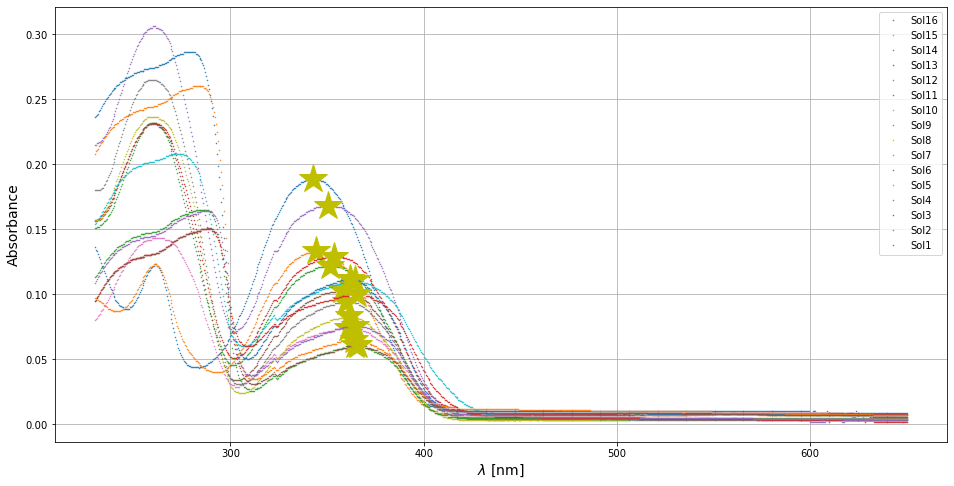

In [6]:
# Vectors that will contain the found values of the peak
vectLambda = []
vectAbsorb = []


xData = df.index
# Range where look for the peak
cond = (xData > 300) & (xData < 400)
xSub = xData[cond].to_numpy()



fig, ax = plt.subplots()
fig.set_size_inches(16,8)


# Iterate over columns
for i in df:
        
    # Plot raw data
    ax.plot(df[i], ls = "", marker = ".", ms = 1, label = i)
    
    # find x and y of the "rightmost" peak
    yData = df[i] 
    ySub = yData[cond].to_numpy()
    
    idx,_ = find_peaks(ySub, height = .03, distance = 100)
    idx = idx[0]
    
    # Plot a marker over the found peak, for check
    ax.plot(xSub[idx], ySub[idx], "*y", ms = 30)
    
    # Export fourn values
    vectLambda.append(xSub[idx])
    vectAbsorb.append(ySub[idx])
    
    
# Some     
ax.set_xlabel("$\lambda$ [nm]", fontsize = 14)
ax.set_ylabel("Absorbance", fontsize = 14)

    
ax.legend()
ax.grid(True)
    
plt.show()


# Convert to numpy array because it is easier to work with for further analysis or plot..
vectLambda = np.array(vectLambda)
vectAbsorb = np.array(vectAbsorb)
    

Another way to plot data

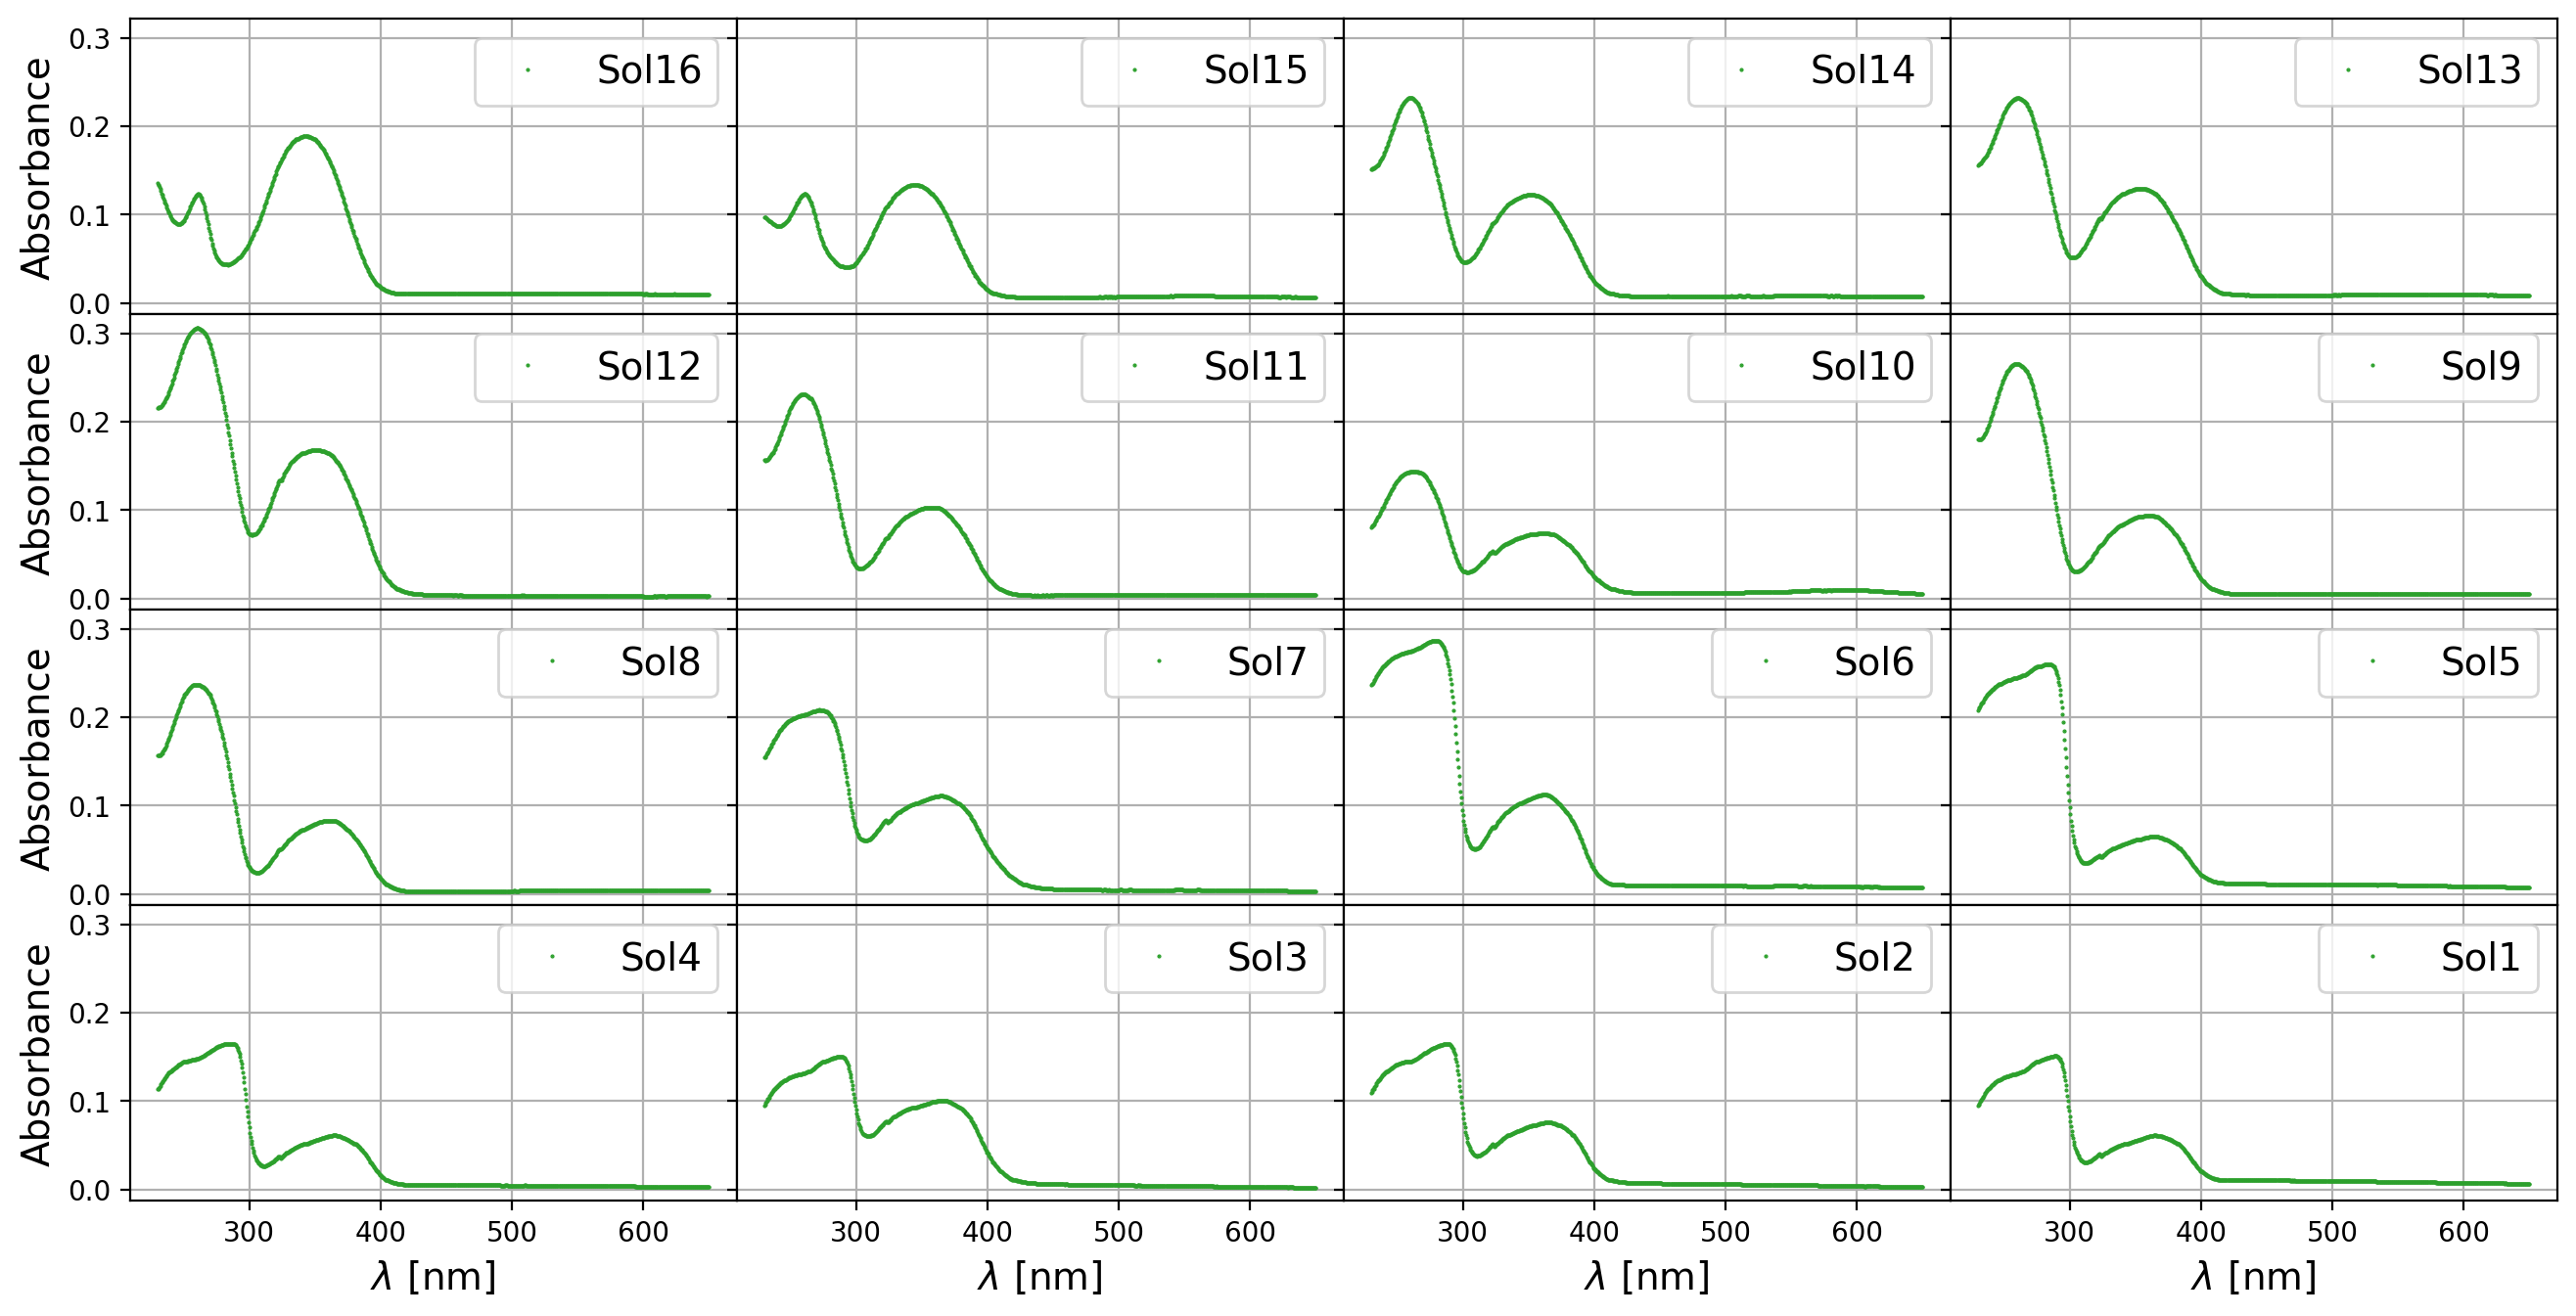

In [7]:
fig, ax = plt.subplots(4,4, dpi = 200, sharey = True)
fig.set_size_inches(16,8)
fig.subplots_adjust(wspace = 0, hspace = 0)
axx = ax.flatten()

for i, j in enumerate(df):
    ax = axx[i]
    ax.plot(df[j], ls = "", marker = ".", ms = 1, label = j, c = "tab:green")

    if i>11:
        ax.set_xlabel("$\lambda$ [nm]", fontsize = 14)
    if i%4 == 0:
        ax.set_ylabel("Absorbance", fontsize = 14)

    ax.legend(fontsize = 14)
    ax.grid(True)
    
plt.show()
    


At this point we've two vectors, containing the $\lambda$ and the absorbance for each data set.

Now let's plot the peak wavelength of each spectrum as a function of DNA concentration and the absorbance at the bound dapi peak versus DNA concentration 

In [8]:
# Concentrazione microMolare [uM]
concDNA = np.array((0, 10, 20, 40,
                    50, 60, 80, 90,
                    100, 200, 400, 600,
                    700, 800, 900, 1000))

# soluzione 1 = più concentrat
# soluzione 16 = meno concentrata

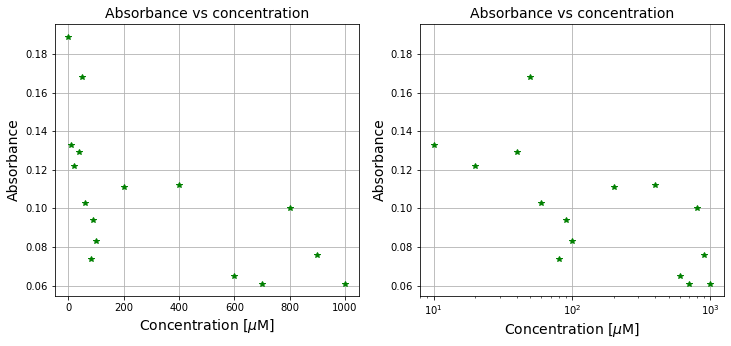

In [9]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,5)

#ax.plot(np.array(listaCol2), vectLambda, "*g")

for a in ax:
    a.plot(concDNA, vectAbsorb, "*g")

    a.set_title("Absorbance vs concentration", fontsize = 14)
    a.set_xlabel("Concentration [$\mu$M]", fontsize = 14)
    a.set_ylabel("Absorbance", fontsize = 14)

    a.grid()
ax[1].set_xscale("log")

plt.show()

## Fit with independent binding model

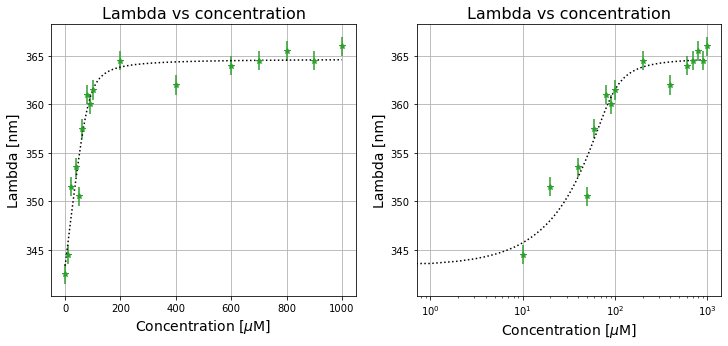

I0 = 42.9174
I0*D = 343.3394
Delta I = 2.6724
Delta I * D = 21.3791
n = 0.0948
K diss = 0.4764
n/k = 0.1989


In [10]:
%matplotlib inline

D = 8 # 8uM
def funToFit(Cdna, I0, DI, n, Kdiss):
    return I0*D + DI * .5 * (n*Cdna + D + Kdiss - np.sqrt((n*Cdna + D + Kdiss)**2 - 4*n*D*Cdna))

def PIPPO(Cdna, I0, DI, n, Kdiss):
    return  .5 * (n*Cdna + D + Kdiss + np.sqrt((n*Cdna + D + Kdiss)**2 - 4*n*D*Cdna))
    


popt, pcov = curve_fit(funToFit, concDNA, vectLambda, maxfev = 1000000)#, p0 = (-144000, 0, 365))

fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,5)

#ax.plot(np.array(listaCol2), vectLambda, "*g")

xDenso = np.linspace(concDNA.min(), concDNA.max(), 1000)

for a in ax:
    #a.plot(concDNA, vectLambda, "*g")
    a.errorbar(concDNA, vectLambda, yerr = 1, marker = "*", c = "tab:green", ls = "") #xerr = .05 * concDNA
    a.plot(xDenso, funToFit(xDenso, *popt), ":k")

    a.set_title("Lambda vs concentration", fontsize = 16)
    a.set_xlabel("Concentration [$\mu$M]", fontsize = 14)
    a.set_ylabel("Lambda [nm]", fontsize = 14)

    a.grid()
    
ax[1].set_xscale("log")

plt.show()
"""
fig, ax = plt.subplots()
ax.plot(concDNA, PIPPO(concDNA, *popt), color = "red")
plt.show()
"""

print(f"I0 = {popt[0]:.4f}")
print(f"I0*D = {popt[0]*D:.4f}") # Offset

print(f"Delta I = {popt[1]:.4f}")
print(f"Delta I * D = {popt[1]*D:.4f}") # Dynamic range

print(f"n = {popt[2]:.4f}")
print(f"K diss = {popt[3]:.4f}")
print(f"n/k = {popt[2]/popt[3]:.4f}")


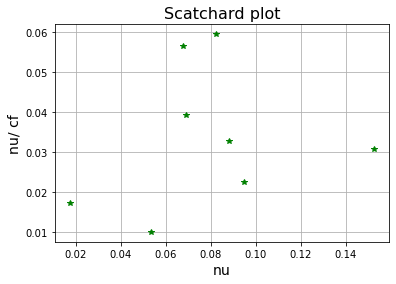

In [11]:
def myLine(x,m,q):
    return m*x+q

Cb = (vectLambda - popt[0]*D ) / popt[1]
Cb = Cb[1:]

tmpLogic = (Cb >= 1) & (Cb < 7)

nu = Cb[tmpLogic] / concDNA[1:][tmpLogic]
term2 = nu / (D-Cb)[tmpLogic]

#popt, pcov = curve_fit(myLine, nu, term2)

fig, ax = plt.subplots()
ax.plot(nu, term2, "*g")

ax.set_title("Scatchard plot", fontsize = 16)
ax.set_xlabel(f"nu", fontsize = 14)
ax.set_ylabel(f"nu/ cf", fontsize = 14)

ax.grid()
#ax.set_ylim((-.1, .2))

plt.show()

Now I consider the absorbance at Sol16 peak (I fix the $\lambda$ at sol16 peak...)

# Use numpy
From now on, I will use numpy since for me it's easy to work with

I will have a matrix `myMatrix` where each column is a dataset and each row the value corresponding to a particular wavelength, which is stored in the vector `myLambda`


In [12]:
# matrix of data
myMatrix = df.to_numpy()
myMatrix.shape

(841, 16)

In [13]:
# Vect of scanned lambda
myLambda = df.index.values
myLambda.shape

(841,)

In [14]:
# wavelength of the peak of sol 16. Now is sol 1
lambda16 = vectLambda[-1]
#np.where is such a bad method.. this is the way to obdain the index corrisponding to tha lambda
myIdx = np.where(myLambda == lambda16)[0][0] 

# let's cross check
print(f"Lambda of peak 16 is {lambda16}. I am assuming she is {myLambda[myIdx]}")

Lambda of peak 16 is 366.0. I am assuming she is 366.0


Now let's plot this value of the absorbance vs the concentration

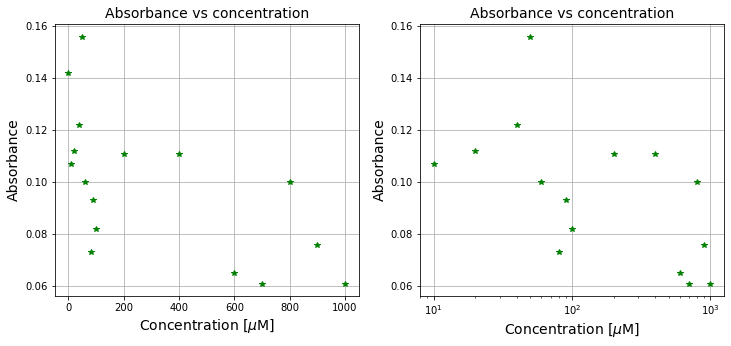

array([0.142, 0.107, 0.112, 0.122, 0.156, 0.1  , 0.073, 0.093, 0.082,
       0.111, 0.111, 0.065, 0.061, 0.1  , 0.076, 0.061])

In [15]:
vectNewAbsorbance = myMatrix[myIdx,:] 

fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,5)

#ax.plot(np.array(listaCol2), vectLambda, "*g")

for a in ax:
    a.plot(concDNA, vectNewAbsorbance, "*g")

    a.set_title("Absorbance vs concentration", fontsize = 14)
    a.set_xlabel("Concentration [$\mu$M]", fontsize = 14)
    a.set_ylabel("Absorbance", fontsize = 14)

    a.grid()
ax[1].set_xscale("log")

plt.show()

vectNewAbsorbance

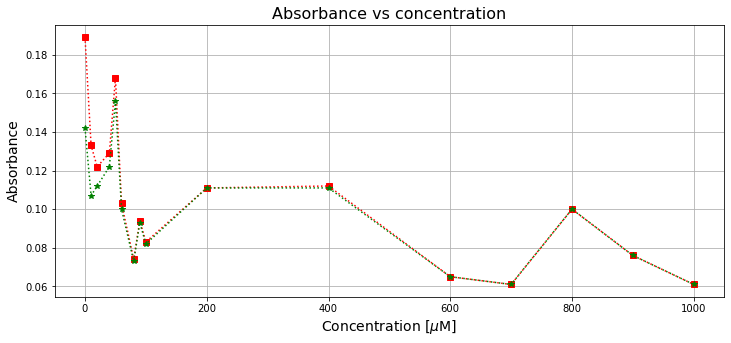

In [16]:
# Affianco le due abs

fig, ax = plt.subplots()
fig.set_size_inches(12,5)

#ax.plot(np.array(listaCol2), vectLambda, "*g")

ax.plot(concDNA, vectAbsorb, "sr:")
ax.plot(concDNA, vectNewAbsorbance, "*g:")



ax.set_title("Absorbance vs concentration", fontsize = 16)
ax.set_xlabel("Concentration [$\mu$M]", fontsize = 14)
ax.set_ylabel("Absorbance", fontsize = 14)

ax.grid()

plt.show()

# Linear combination

- First of all i subtract the baseline, computed as the mean value of each dataset in the range 450nm - 600nm
- Then in the range 310nm - 420nm I normalize each spectrum (i.e. the sum of the $y$ is 1). I do this by multiplying each spectrum for a factor which is $1/\Sigma$
- I compute $a*\text{Sol}_{16} + (1-a) * \text{Sol}_1$ where $a \in (0, 1)$ in order to reconstruct a normalized linear combination
- I compute SSE
- I choose the value of a which minimize SSE for each spectum

In [17]:
idxStart = np.where(myLambda >= 310)[0][0] 
idxStop =  np.where(myLambda <= 420)[0][-1] 

# Cross check, since np.where is very bad method
print(myLambda[idxStart], myLambda[idxStop])

# Data to use to compune linear comb
dataLC = myMatrix[idxStart:idxStop, :]
print(dataLC.shape)

# Compute the baseline
idxStartBase = np.where(myLambda >= 450)[0][0] 
idxStopBase =  np.where(myLambda <= 600)[0][-1] 
vectBaseline = np.mean(myMatrix[idxStartBase:idxStopBase, :], axis = 0)
print(vectBaseline.shape)
matBaseline = np.repeat(vectBaseline[np.newaxis, :], dataLC.shape[0], axis = 0)
print(matBaseline.shape)

# Subtract baseline
dataLC = dataLC - matBaseline

310.0 420.0
(220, 16)
(16,)
(220, 16)


In [18]:
vectStepA = np.arange(0, 1, .0001)

# Reference spectra, normalized
spect16 = dataLC[:,0]
spect16 = spect16 / np.sum(spect16)
err16 = np.sqrt(spect16)

spect1 = dataLC[:,-1]
spect1 = spect1 / np.sum(spect1)
err1 = np.sqrt(spect1)

vectBestA = []


# Iterate over eaxh sol (idx are just column index, not solution index)
for i in range (16):
    print(f"{i} \t-> sol{16-i}")
    
    # Get the spectrum i want to obtain as linear comb
    refSpectr = dataLC[:,i]
    # and normalize to its sum
    refSpectr = refSpectr / np.sum(refSpectr)
    
    currSSE = np.iinfo(np.int32).max
    currBestA = np.nan
    
    for a in vectStepA:
        tmpLC = a * spect16 + (1-a) * spect1
        
        errLinComb = np.sqrt( (a*err16)**2 + ((1-a)*err1)**2 )
        tmpSSE = np.sum((tmpLC - refSpectr)**2 / (errLinComb**2 + refSpectr) ) 
        
        if tmpSSE < currSSE:
            currSSE = tmpSSE
            currBestA = a
    
    vectBestA.append(currBestA)
        
        

0 	-> sol16
1 	-> sol15
2 	-> sol14
3 	-> sol13
4 	-> sol12
5 	-> sol11
6 	-> sol10
7 	-> sol9
8 	-> sol8
9 	-> sol7
10 	-> sol6
11 	-> sol5
12 	-> sol4
13 	-> sol3
14 	-> sol2
15 	-> sol1


In [19]:
vectBestA

[0.9999,
 0.9238000000000001,
 0.4848,
 0.38820000000000005,
 0.43270000000000003,
 0.2457,
 0.1325,
 0.1865,
 0.5788,
 0.0,
 0.219,
 0.0747,
 0.0514,
 0.0,
 0.029300000000000003,
 0.0]

In [20]:
for i in range (16):
    print(f"{i} \t-> sol{16-i} \t -> Best A: {vectBestA[i]}")

0 	-> sol16 	 -> Best A: 0.9999
1 	-> sol15 	 -> Best A: 0.9238000000000001
2 	-> sol14 	 -> Best A: 0.4848
3 	-> sol13 	 -> Best A: 0.38820000000000005
4 	-> sol12 	 -> Best A: 0.43270000000000003
5 	-> sol11 	 -> Best A: 0.2457
6 	-> sol10 	 -> Best A: 0.1325
7 	-> sol9 	 -> Best A: 0.1865
8 	-> sol8 	 -> Best A: 0.5788
9 	-> sol7 	 -> Best A: 0.0
10 	-> sol6 	 -> Best A: 0.219
11 	-> sol5 	 -> Best A: 0.0747
12 	-> sol4 	 -> Best A: 0.0514
13 	-> sol3 	 -> Best A: 0.0
14 	-> sol2 	 -> Best A: 0.029300000000000003
15 	-> sol1 	 -> Best A: 0.0
